# Business Problem Statement
- Problem Statement for Machine Learning : How to predict Employee's Promotion so we can have precise target of potential and outstanding employee in order to reduce subjectivity approach and optimize the working environment ?

- Problem Statement for Analytics : What Employee's Profile should we maintain in order to find potential candidate?

- This Analytical Approach will be used by a Start Up Company (E-Commerce field), People Development Division to analyze and to predict the potential candidate.
- Project Limitation : Employee Profile (Under Manager)

- Feature Explanation :
    - department: Department of employee
    - region: Region of employment 
    - education: Education Level
    - gender: Gender of Employee
    - recruitment_channel: Channel of recruitment for employee
    - no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
    - age: Age of Employee
    - previous_ year_ rating: Employee Rating for the previous year
    - length_ of_ service: Length of service in years
    - awards_ won?: if awards won during previous year then 1 else 0
    - avg_ training_ score: Average score in current training evaluations
    - is_promoted: (Target) Recommended for promotion

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.drop('employee_id',inplace=True,axis=1)

In [5]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


- Check Datatypes

In [6]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


- Convert Datatypes

In [8]:
df['awards_won?'] = df['awards_won?'].astype('object')

In [9]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?              object
avg_training_score        int64
is_promoted               int64
dtype: object

- Datasets Info

In [10]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) *100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [11]:
pd.DataFrame(dataDesc,columns=[
    "Data Features",
    "Data Type",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,department,object,0,0.00,9,"[Technology, Analytics]"
1,region,object,0,0.00,34,"[region_22, region_1]"
2,education,object,2409,4.40,3,"[Below Secondary, Master's & above]"
3,gender,object,0,0.00,2,"[f, m]"
4,recruitment_channel,object,0,0.00,3,"[other, referred]"
5,no_of_trainings,int64,0,0.00,10,"[2, 8]"
6,age,int64,0,0.00,41,"[27, 52]"
7,previous_year_rating,float64,4124,7.52,5,"[5.0, 4.0]"
8,length_of_service,int64,0,0.00,35,"[13, 2]"
9,awards_won?,object,0,0.00,2,"[1, 0]"


In [12]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,99.000000,1.000000


In [13]:
df.describe(include='O')

,department,region,education,gender,recruitment_channel,awards_won?
count,54808,54808,52399,54808,54808,54808
unique,9,34,3,2,3,2
top,Sales & Marketing,region_2,Bachelor's,m,other,0
freq,16840,12343,36669,38496,30446,53538


- Check Missing Value

In [14]:
df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

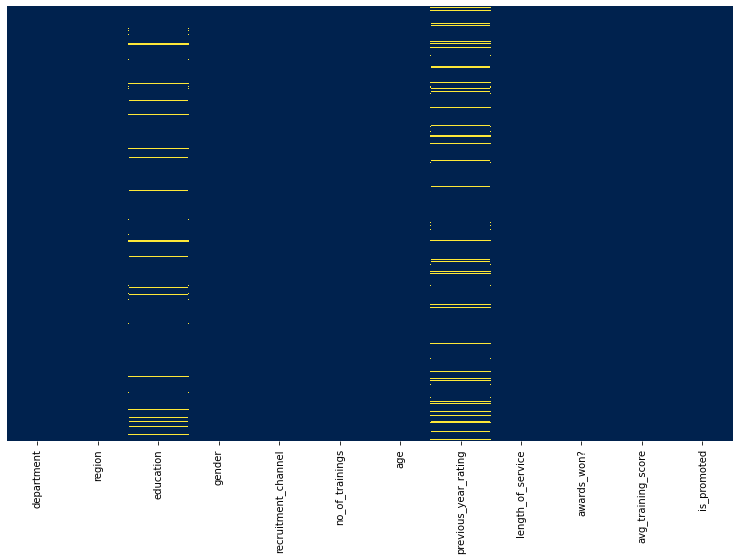

In [15]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(),cmap='cividis',yticklabels=False,cbar=False)
plt.show()

- Check Imbalance

In [16]:
(pd.crosstab(index=df['is_promoted'],columns='Percentage',normalize=True)*100).round(2) # Datasets are Imbalance

col_0,Percentage
is_promoted,
0,91.48
1,8.52


# Exploratory Data Analysis

- Initial Hypothesis
    - Feature Department, Region, Education, Gender, Recruitment Channel, Number of Trainings, Age, Previous Year Training,
        Length of Service, Awards Won, Average Training Source will affect the Employee Promotion

In [17]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


- Data Distribution (For Numerical Continuous Data)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  object 
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 5.0+ MB


- Data Distribution (No of Trainings Feature)
    - Divided into two categorical (Promoted and Not Promoted)

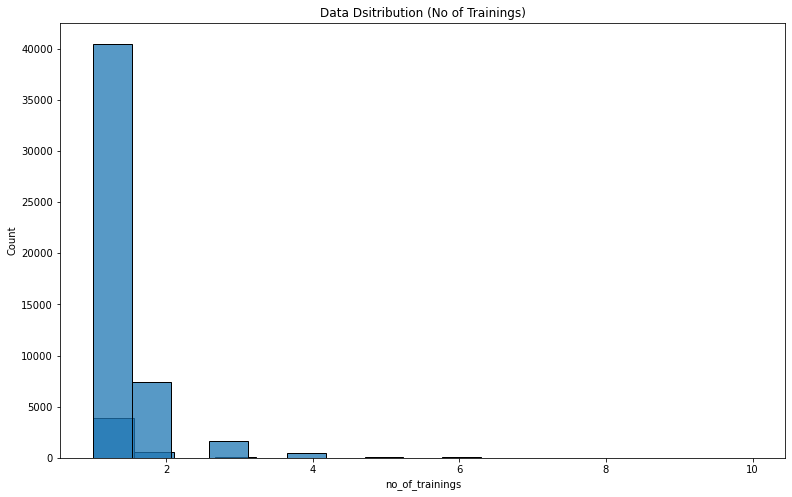

In [19]:
plt.figure(figsize=(13,8))
plt.title('Data Dsitribution (No of Trainings)')
sns.histplot(df[df['is_promoted']==1]['no_of_trainings'],bins=9);
sns.histplot(df[df['is_promoted']==0]['no_of_trainings']);

- Data Distribution (Age Feature)
    - Divided into two categorical (Promoted and Not Promoted)

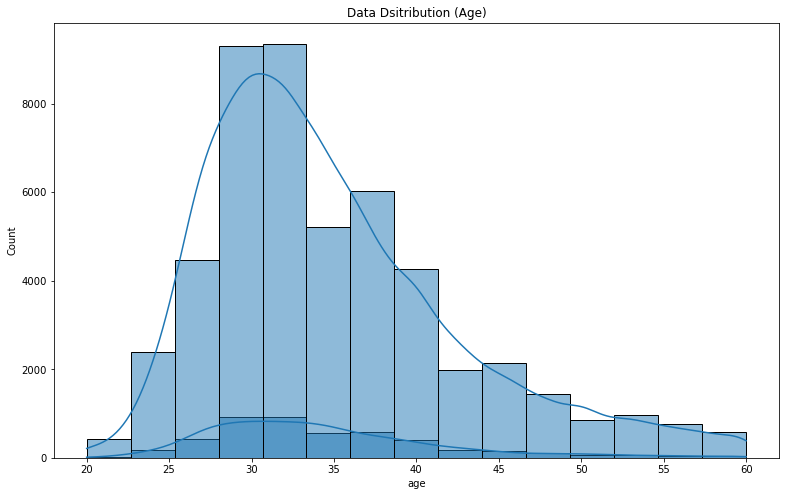

In [20]:
plt.figure(figsize=(13,8))
plt.title('Data Dsitribution (Age)')
sns.histplot(df[df['is_promoted']==1]['age'],bins=15,kde=True);
sns.histplot(df[df['is_promoted']==0]['age'],bins=15,kde=True);

- Data Distribution (Previous Year Rating Feature)
    - Divided into two categorical (Promoted and Not Promoted)

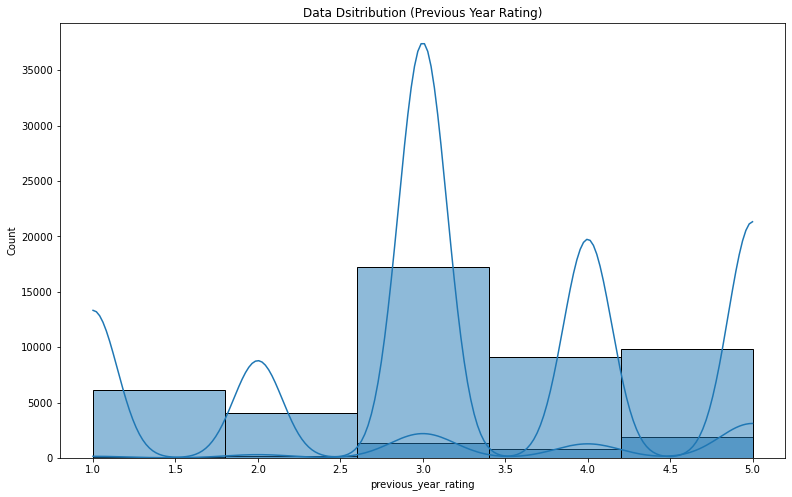

In [21]:
plt.figure(figsize=(13,8))
plt.title('Data Dsitribution (Previous Year Rating)')
sns.histplot(df[df['is_promoted']==1]['previous_year_rating'],bins=5,kde=True);
sns.histplot(df[df['is_promoted']==0]['previous_year_rating'],bins=5,kde=True);

- Data Distribution (Length of Service Feature)
    - Divided into two categorical (Promoted and Not Promoted)

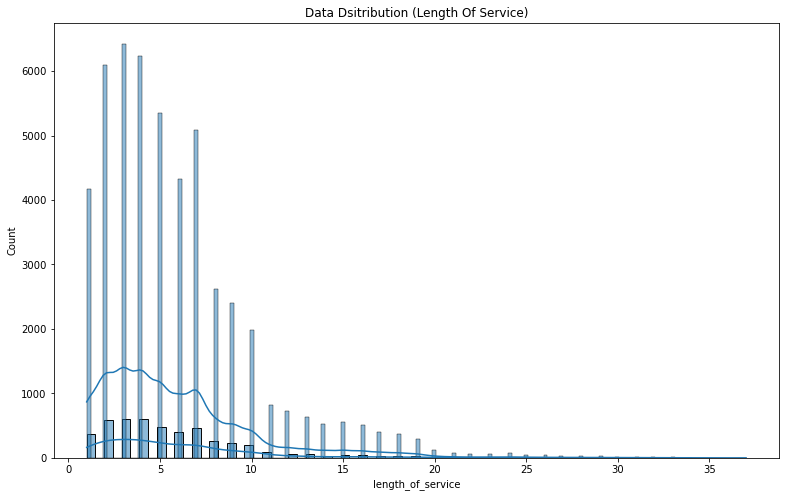

In [22]:
plt.figure(figsize=(13,8))
plt.title('Data Dsitribution (Length Of Service)')
sns.histplot(df[df['is_promoted']==1]['length_of_service'],kde=True);
sns.histplot(df[df['is_promoted']==0]['length_of_service'],kde=True);

- Data Distribution (Avg Training Score Feature)
    - Divided into two categorical (Promoted and Not Promoted)

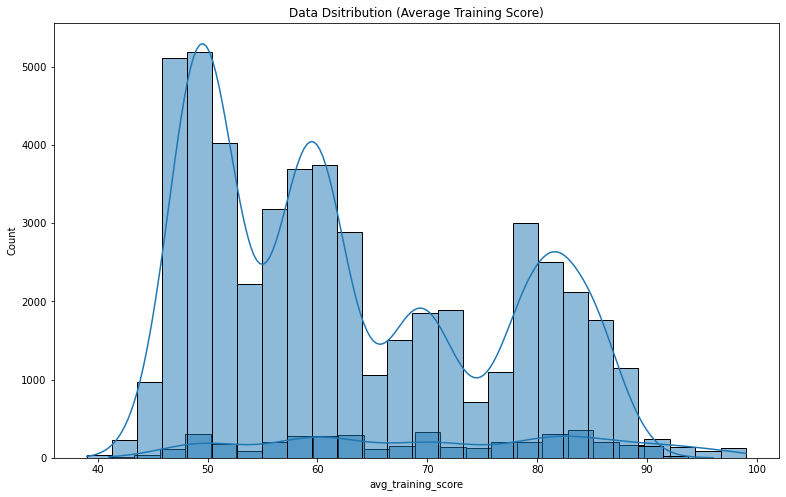

In [23]:
plt.figure(figsize=(13,8))
plt.title('Data Dsitribution (Average Training Score)')
sns.histplot(df[df['is_promoted']==1]['avg_training_score'],bins=25,kde=True);
sns.histplot(df[df['is_promoted']==0]['avg_training_score'],bins=25,kde=True);

- Data Cardinalities (For Categorical Data)

- Data Cardinalities (Department Features)

In [24]:
pd.crosstab(index=df['department'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
department,
Sales & Marketing,16840
Operations,11348
Procurement,7138
Technology,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


- Data Cardinalities (Region Features)

In [25]:
pd.crosstab(index=df['region'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


- Data Cardinalities (Education Features)

In [26]:
pd.crosstab(index=df['education'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


- Data Cardinalities (Gender Features)

In [27]:
pd.crosstab(index=df['gender'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
gender,
m,38496
f,16312


- Data Cardinalities (Recruitment Channel Features)

In [28]:
pd.crosstab(index=df['recruitment_channel'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


- Data Cardinalities (Awards Won Features)

In [29]:
pd.crosstab(index=df['awards_won?'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
awards_won?,
0,53538
1,1270


- Data Cardinalities (Promoted (Target) Features)

In [30]:
pd.crosstab(index=df['is_promoted'],columns='Count').sort_values('Count',ascending =False)

col_0,Count
is_promoted,
0,50140
1,4668


- Missing Values Detected on Education and Previous Year Rating Feature, instead of Dropping the Rows, we try to fiiling the Missing values with Mode

In [31]:
dataDesc1 = []

for i in df.columns:
    dataDesc1.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) *100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [32]:
pd.DataFrame(dataDesc1,columns=[
    "Data Features",
    "Data Type",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,department,object,0,0.00,9,"[Procurement, Analytics]"
1,region,object,0,0.00,34,"[region_22, region_10]"
2,education,object,2409,4.40,3,"[Below Secondary, nan]"
3,gender,object,0,0.00,2,"[m, f]"
4,recruitment_channel,object,0,0.00,3,"[sourcing, other]"
5,no_of_trainings,int64,0,0.00,10,"[7, 4]"
6,age,int64,0,0.00,41,"[48, 51]"
7,previous_year_rating,float64,4124,7.52,5,"[2.0, 1.0]"
8,length_of_service,int64,0,0.00,35,"[28, 6]"
9,awards_won?,object,0,0.00,2,"[1, 0]"


- Finding the Correlation and Association Between Features

- Correlation Ratio (For Numerical Features)
- Association (For Categorical Features) Cramer's V and Theil's U

In [33]:
df_numerical = df[['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score','is_promoted']]

In [34]:
df_categorical = df[['department','region','education','gender','recruitment_channel','awards_won?','is_promoted']]

In [35]:
df_numerical.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
0,1,35,5.0,8,49,0
1,1,30,5.0,4,60,0
2,1,34,3.0,7,50,0
3,2,39,1.0,10,50,0
4,1,45,3.0,2,73,0


In [36]:
df_categorical.head()

,department,region,education,gender,recruitment_channel,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,0,0
1,Operations,region_22,Bachelor's,m,other,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,0,0
4,Technology,region_26,Bachelor's,m,other,0,0


In [37]:
import scipy.stats as ss
from collections import Counter
import math

In [38]:
from dython.nominal import correlation_ratio, cramers_v, theils_u

In [39]:
a = correlation_ratio(df_numerical['is_promoted'],df_numerical['no_of_trainings'])
a

0.024895917682412384

In [40]:
b = correlation_ratio(df_numerical['is_promoted'],df_numerical['age'])
b

0.01716589167893025

In [41]:
c = correlation_ratio(df_numerical['is_promoted'],df_numerical['previous_year_rating'])
c

0.12599059417959624

In [42]:
d = correlation_ratio(df_numerical['is_promoted'],df_numerical['length_of_service'])
d

0.010669866544734017

In [43]:
e = correlation_ratio(df_numerical['is_promoted'],df_numerical['avg_training_score'])
e

0.18114671957888692

In [44]:
corr = [a,b,c,d,e,1]

In [45]:
df_corr = pd.DataFrame(data=[corr],index=['is_promoted'],columns=df_numerical.columns)
df_corr

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted
is_promoted,0.024896,0.017166,0.125991,0.01067,0.181147,1


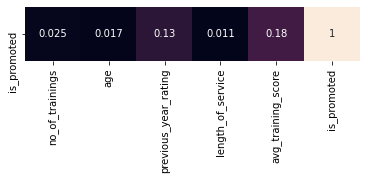

In [46]:
plt.figure(figsize=(6,1))
sns.heatmap(df_corr,cbar=False,annot=True);

- From Correlation Ratio between Target Feature and Continuous Numerical Features, found that "Previous Year Rating" and "Avg Training Score" have impact on Target Feature

In [47]:
def cramers (x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0,phi2 - ((k - 1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    hasil = np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
    return hasil

In [48]:
df_categorical.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'awards_won?', 'is_promoted'],
      dtype='object')

In [49]:
assoc_cramers = []
for i in df_categorical.columns:
    assoc = round(cramers(df_categorical['is_promoted'],df_categorical[i]),2)
    assoc_cramers.append(assoc)

In [50]:
df_cramers = pd.DataFrame(data=[assoc_cramers],index=['is_promoted'],columns=df_categorical.columns)
df_cramers

,department,region,education,gender,recruitment_channel,awards_won?,is_promoted
is_promoted,0.05,0.09,0.03,0.01,0.02,0.2,1.0


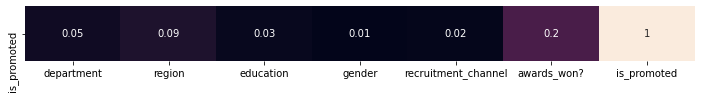

In [51]:
plt.figure(figsize=(12,1))
sns.heatmap(df_cramers,cbar=False,annot=True);

In [52]:
def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurences
        p_y = y_counter[xy[1]] / total_occurences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

In [53]:
def theils(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurences = sum(x_counter.values())
    p_x = list(map(lambda n : n/total_occurences,x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0 :
        return 1
    else:
        return (s_x - s_xy) / s_x

In [54]:
assoc_theils = []
for i in df_categorical.columns:
    assoc = round(theils(df_categorical['is_promoted'],df_categorical[i]),2)
    assoc_theils.append(assoc)

In [55]:
df_theils = pd.DataFrame(data=[assoc_theils],index=['is_promoted'],columns=df_categorical.columns)
df_theils

,department,region,education,gender,recruitment_channel,awards_won?,is_promoted
is_promoted,0.0,0.02,0.0,0.0,0.0,0.04,1.0


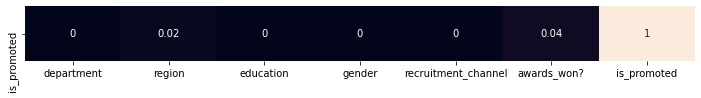

In [56]:
plt.figure(figsize=(12,1))
sns.heatmap(df_theils,cbar=False,annot=True);

- From Cramer's V Association between Target Feature and Categorical Features, found that "Awars Won" has impact on Target Feature

- Bivariate Analysis

In [57]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


- Finding the Relationship between Department and Target Feature

In [58]:
pd.crosstab(index=df['department'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
department,,
Sales & Marketing,15627,1213
Operations,10325,1023
Technology,6370,768
Procurement,6450,688
Analytics,4840,512
Finance,2330,206
HR,2282,136
R&D,930,69
Legal,986,53


In [59]:
(pd.crosstab(index=df['department'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
department,,
Sales & Marketing,31.17,25.99
Operations,20.59,21.92
Technology,12.70,16.45
Procurement,12.86,14.74
Analytics,9.65,10.97
Finance,4.65,4.41
HR,4.55,2.91
R&D,1.85,1.48
Legal,1.97,1.14


In [60]:
# Most of them who got Promoted are from Sales & Marketing Department

In [61]:
(pd.crosstab(index=df['department'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
department,,
Technology,89.24,10.76
Procurement,90.36,9.64
Analytics,90.43,9.57
Operations,90.99,9.01
Finance,91.88,8.12
Sales & Marketing,92.80,7.20
R&D,93.09,6.91
HR,94.38,5.62
Legal,94.90,5.10


In [76]:
# But the biggest proportion of Promotions from a region is in Technolgy Department

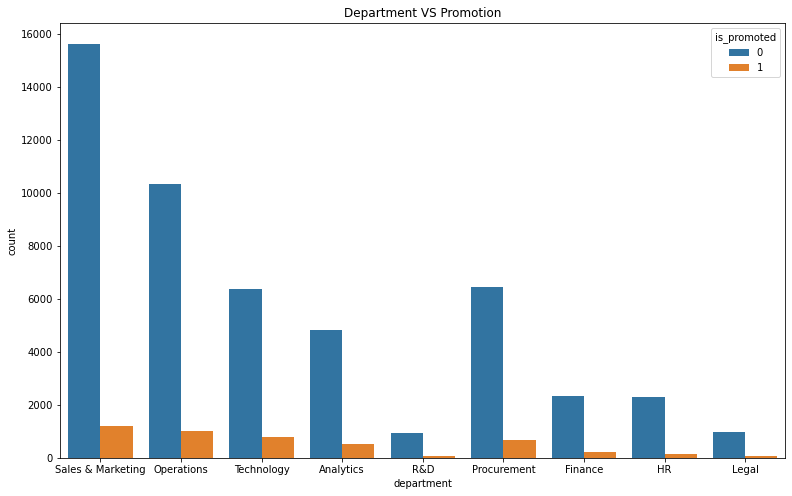

In [63]:
plt.figure(figsize=(13,8))
plt.title('Department VS Promotion')
sns.countplot(x=df['department'],hue=df['is_promoted']);

In [64]:
# Visualization of Data Relationship Between Department and Promotion

- Finding the Relationship between Region and Target Feature

In [65]:
pd.crosstab(index=df['region'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
region,,
region_2,11354,989
region_22,5694,734
region_7,4327,516
region_4,1457,246
region_13,2418,230
region_15,2586,222
region_28,1164,154
region_26,2117,143
region_23,1038,137


In [65]:
(pd.crosstab(index=df['region'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
region,,
region_2,22.64,21.19
region_22,11.36,15.72
region_7,8.63,11.05
region_4,2.91,5.27
region_13,4.82,4.93
region_15,5.16,4.76
region_28,2.32,3.30
region_26,4.22,3.06
region_23,2.07,2.93


In [74]:
# Most of them who got Promoted are from Region 2

In [66]:
(pd.crosstab(index=df['region'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
region,,
region_4,85.55,14.45
region_17,86.31,13.69
region_25,87.42,12.58
region_28,88.32,11.68
region_23,88.34,11.66
region_22,88.58,11.42
region_3,89.31,10.69
region_7,89.35,10.65
region_1,90.49,9.51


In [75]:
# But the biggest proportion of Promotions from a region is in Region 4

- Finding the Relationship between Education and Target Feature

In [67]:
pd.crosstab(index=df['education'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
education,,
Bachelor's,33661,3008
Master's & above,13454,1471
Below Secondary,738,67


In [68]:
(pd.crosstab(index=df['education'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
education,,
Bachelor's,70.34,66.17
Master's & above,28.12,32.36
Below Secondary,1.54,1.47


In [78]:
# Most of them who got Promoted are the one who earned Bachelor's Degree

In [69]:
(pd.crosstab(index=df['education'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
education,,
Master's & above,90.14,9.86
Below Secondary,91.68,8.32
Bachelor's,91.80,8.20


In [79]:
# But the biggest proportion of Promotions based on Education Background is the one who have Master' Degree and above

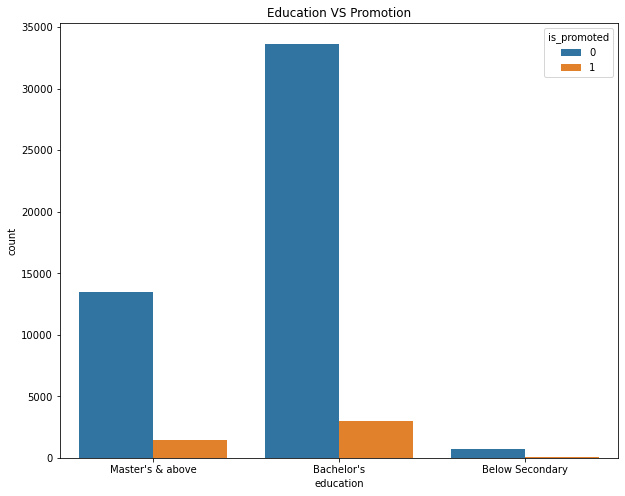

In [70]:
plt.figure(figsize=(10,8))
plt.title('Education VS Promotion')
sns.countplot(x=df['education'],hue=df['is_promoted']);

In [80]:
# Visualization of Data Relationship Between Education Background and Promotion

- Finding the Relationship between Gender and Target Feature

In [71]:
pd.crosstab(index=df['gender'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
gender,,
m,35295,3201
f,14845,1467


In [72]:
(pd.crosstab(index=df['gender'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
gender,,
m,70.39,68.57
f,29.61,31.43


In [89]:
# Most of them who got Promotion are Male Employee

In [73]:
(pd.crosstab(index=df['gender'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
gender,,
f,91.01,8.99
m,91.68,8.32


In [90]:
# But the biggest proportion of Promotions based on Gender is Female Employee

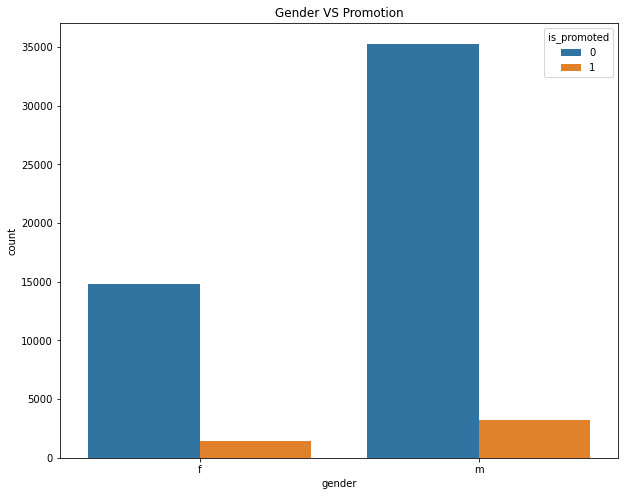

In [74]:
plt.figure(figsize=(10,8))
plt.title('Gender VS Promotion')
sns.countplot(x=df['gender'],hue=df['is_promoted']);

In [81]:
# Visualization of Data Relationship Between Gender and Promotion

- Finding the Relationship between Recruitment Channel and Target Feature

In [75]:
pd.crosstab(index=df['recruitment_channel'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
recruitment_channel,,
other,27890,2556
sourcing,21246,1974
referred,1004,138


In [76]:
(pd.crosstab(index=df['recruitment_channel'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
recruitment_channel,,
other,55.62,54.76
sourcing,42.37,42.29
referred,2.00,2.96


In [91]:
# Most of them who got Promoted are recruited from unknown resources

In [77]:
(pd.crosstab(index=df['recruitment_channel'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
recruitment_channel,,
referred,87.92,12.08
sourcing,91.50,8.50
other,91.60,8.40


In [92]:
# But the biggest proportion of Promotions based on Recruitment Channel is from Reference

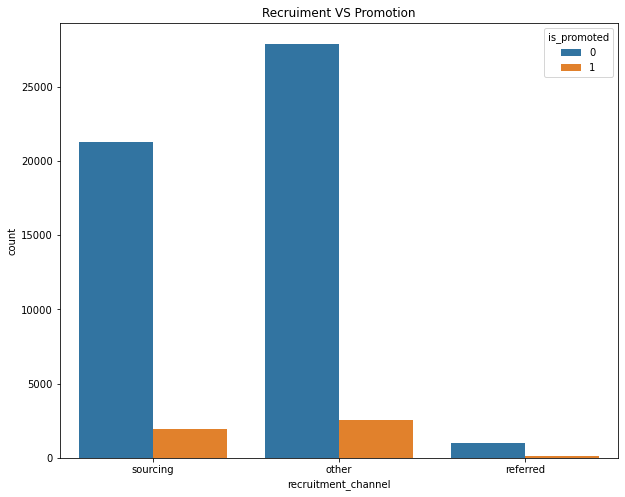

In [78]:
plt.figure(figsize=(10,8))
plt.title('Recruiment VS Promotion')
sns.countplot(x=df['recruitment_channel'],hue=df['is_promoted']);

In [82]:
# Visualization of Data Relationship Between Recruitment Channel and Promotion

- Finding the Relationship between Age and Target Feature, using Binning

In [79]:
bin_age = [19,25,30,35,40,45,50,55,60]

In [80]:
label_age = ['A','B','C','D','E','F','G','H']

In [81]:
df['age_recat'] = pd.cut(df['age'],bins=bin_age,labels=label_age)

In [82]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E


In [83]:
pd.crosstab(index=df['age_recat'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
age_recat,,
C,14570,1495
B,13754,1350
D,9099,864
E,4647,390
A,2814,200
F,2595,178
G,1593,118
H,1068,73


In [84]:
(pd.crosstab(index=df['age_recat'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
age_recat,,
C,29.06,32.03
B,27.43,28.92
D,18.15,18.51
E,9.27,8.35
A,5.61,4.28
F,5.18,3.81
G,3.18,2.53
H,2.13,1.56


In [85]:
(pd.crosstab(index=df['age_recat'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
age_recat,,
C,90.69,9.31
B,91.06,8.94
D,91.33,8.67
E,92.26,7.74
G,93.10,6.90
A,93.36,6.64
F,93.58,6.42
H,93.60,6.40


In [93]:
# Most of them who got Promotion and the biggest proportion of Promotion are from Age Range between 31-35

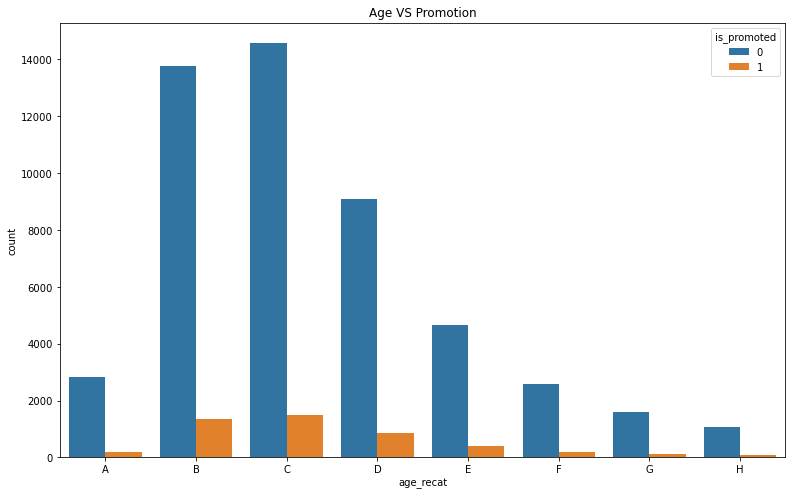

In [86]:
plt.figure(figsize=(13,8))
plt.title('Age VS Promotion')
sns.countplot(x=df['age_recat'],hue=df['is_promoted']);

In [83]:
# Visualization of Data Relationship Between Age and Promotion

- Finding the Relationship between No of Trainings and Target Feature using Recategorize

In [87]:
def trainings_recat(x):
    if x == 1:
        return 1
    else :
        return "Others"

In [88]:
df['no_of_trainings_recat'] = df['no_of_trainings'].apply(trainings_recat)

In [89]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1


In [90]:
pd.crosstab(index=df['no_of_trainings_recat'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
no_of_trainings_recat,,
1,40468,3910
Others,9672,758


In [91]:
(pd.crosstab(index=df['no_of_trainings_recat'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
no_of_trainings_recat,,
1,80.71,83.76
Others,19.29,16.24


In [92]:
(pd.crosstab(index=df['no_of_trainings_recat'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
no_of_trainings_recat,,
1,91.19,8.81
Others,92.73,7.27


In [95]:
# Most of them who got Promotion and the biggest proportion of Promotion are from the Employee who has only received 1 training

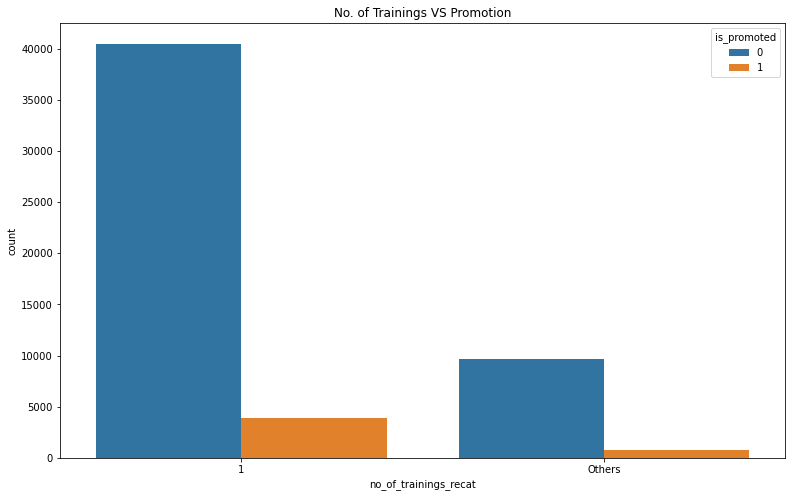

In [93]:
plt.figure(figsize=(13,8))
plt.title('No. of Trainings VS Promotion')
sns.countplot(x=df['no_of_trainings_recat'],hue=df['is_promoted']);

In [84]:
# Visualization of Data Relationship Between No of Trainings and Promotion

- Finding the Relationship between Previous Year Rating and Target Feature

In [94]:
pd.crosstab(index=df['previous_year_rating'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
previous_year_rating,,
5.0,9820,1921
3.0,17263,1355
4.0,9093,784
2.0,4044,181
1.0,6135,88


In [95]:
(pd.crosstab(index=df['previous_year_rating'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
previous_year_rating,,
5.0,21.18,44.38
3.0,37.24,31.30
4.0,19.62,18.11
2.0,8.72,4.18
1.0,13.23,2.03


In [96]:
(pd.crosstab(index=df['previous_year_rating'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
previous_year_rating,,
5.0,83.64,16.36
4.0,92.06,7.94
3.0,92.72,7.28
2.0,95.72,4.28
1.0,98.59,1.41


In [96]:
# Most of them who got Promotion and the biggest proportion of Promotion are from the Employee who has received 5 point from last year Perfromance Appraisal

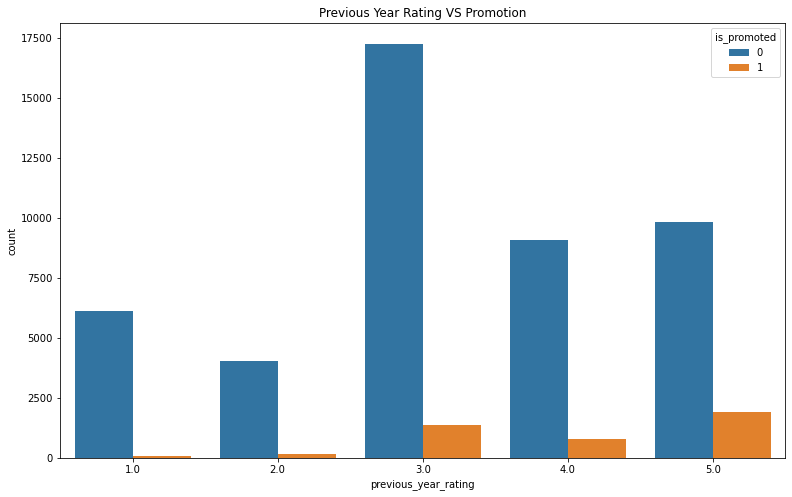

In [97]:
plt.figure(figsize=(13,8))
plt.title('Previous Year Rating VS Promotion')
sns.countplot(x=df['previous_year_rating'],hue=df['is_promoted']);

In [85]:
# Visualization of Data Relationship Between Previous Year Rating and Promotion

- Finding the Relationship between Length of Service and Target Feature, using Binning

In [98]:
bin_length_of_service = [0,5,10,15,20,25,30,35,37]

In [99]:
label_length_of_service = [1,2,3,4,5,6,7,8]

In [100]:
df['length_of_service_recat'] = pd.cut(df['length_of_service'],bins=bin_length_of_service,labels=label_length_of_service)

In [101]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat,length_of_service_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1,2
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1,1
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1,2
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others,2
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1,1


In [102]:
pd.crosstab(index=df['length_of_service_recat'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
length_of_service_recat,,
1,28278,2654
2,16423,1567
3,3254,285
4,1695,134
5,306,19
6,143,6
7,40,3
8,1,0


In [103]:
(pd.crosstab(index=df['length_of_service_recat'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
length_of_service_recat,,
1,56.40,56.86
2,32.75,33.57
3,6.49,6.11
4,3.38,2.87
5,0.61,0.41
6,0.29,0.13
7,0.08,0.06
8,0.00,0.00


In [97]:
# Most of them who got Promoted are the Employee who only worked for 1 year service

In [104]:
(pd.crosstab(index=df['length_of_service_recat'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
length_of_service_recat,,
2,91.29,8.71
1,91.42,8.58
3,91.95,8.05
4,92.67,7.33
7,93.02,6.98
5,94.15,5.85
6,95.97,4.03
8,100.00,0.00


In [99]:
# But the biggest proportion of Promotions are the Employee who worked for 2 years of Service

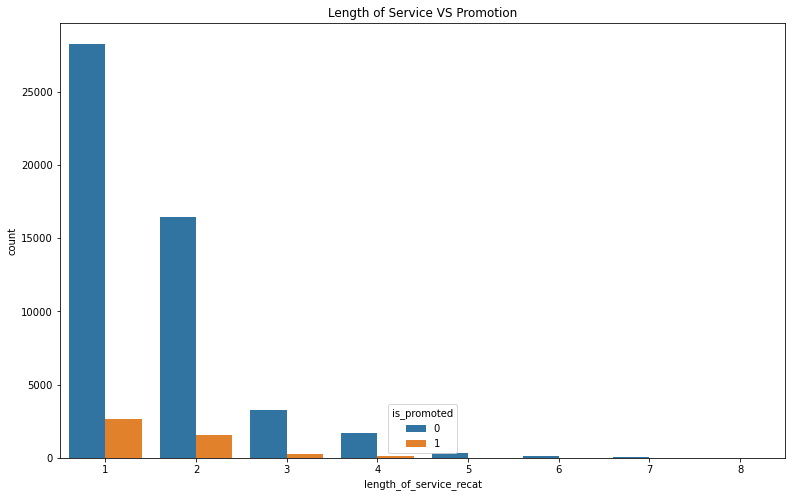

In [105]:
plt.figure(figsize=(13,8))
plt.title('Length of Service VS Promotion')
sns.countplot(x=df['length_of_service_recat'],hue=df['is_promoted']);

In [86]:
# Visualization of Data Relationship Between Length of Service and Promotion

- Finding the Relationship between Awards Won and Target Feature

In [106]:
pd.crosstab(index=df['awards_won?'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [107]:
(pd.crosstab(index=df['awards_won?'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
awards_won?,,
0,98.58,88.02
1,1.42,11.98


In [105]:
# Most of them who got Promoted are the Employee didn't get an award last year, but that was because of the imbalance data

In [108]:
(pd.crosstab(index=df['awards_won?'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
awards_won?,,
1,55.98,44.02
0,92.33,7.67


In [104]:
# But the biggest proportion of Promotions are the Employee who got an award previous year

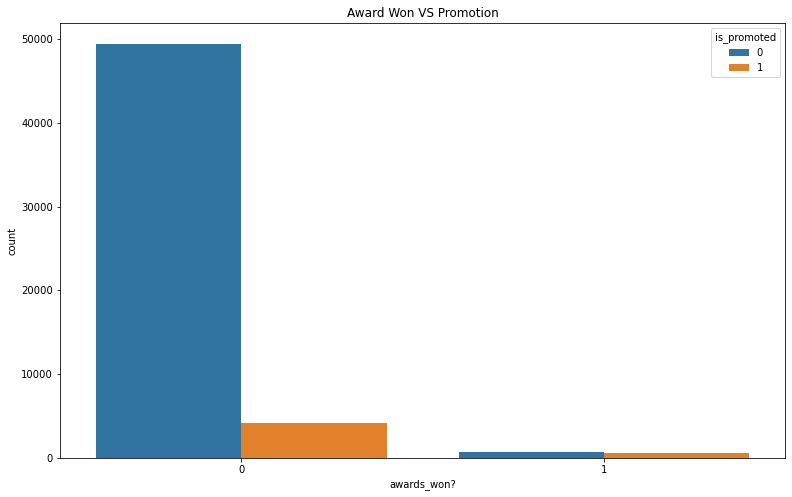

In [109]:
plt.figure(figsize=(13,8))
plt.title('Award Won VS Promotion')
sns.countplot(x=df['awards_won?'],hue=df['is_promoted']);

In [87]:
# Visualization of Data Relationship Between Awards Won and Promotion

- Finding the Relationship between Avg Training Score and Target Feature

In [110]:
bin_avg_training_score = [38,60,80,100]

In [111]:
label_avg_training_score = ['C','B','A']

In [112]:
df['avg_training_score_recat'] = pd.cut(df['avg_training_score'],bins=bin_avg_training_score,labels=label_avg_training_score)

In [113]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat,length_of_service_recat,avg_training_score_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1,2,C
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1,1,C
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1,2,C
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others,2,C
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1,1,B


In [114]:
pd.crosstab(index=df['avg_training_score_recat'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
avg_training_score_recat,,
B,15761,1706
A,7709,1609
C,26670,1353


In [115]:
(pd.crosstab(index=df['avg_training_score_recat'],columns=df['is_promoted'],normalize='columns')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
avg_training_score_recat,,
B,31.43,36.55
A,15.37,34.47
C,53.19,28.98


In [102]:
# Most of them who got Promoted are the Employee who got Averaage Training Score Between 61-80

In [116]:
(pd.crosstab(index=df['avg_training_score_recat'],columns=df['is_promoted'],normalize='index')*100).round(2).sort_values(1,ascending=False)

is_promoted,0,1
avg_training_score_recat,,
A,82.73,17.27
B,90.23,9.77
C,95.17,4.83


In [103]:
# But the biggest proportion of Promotions are the Employee who got Average Training Score Between 81-100

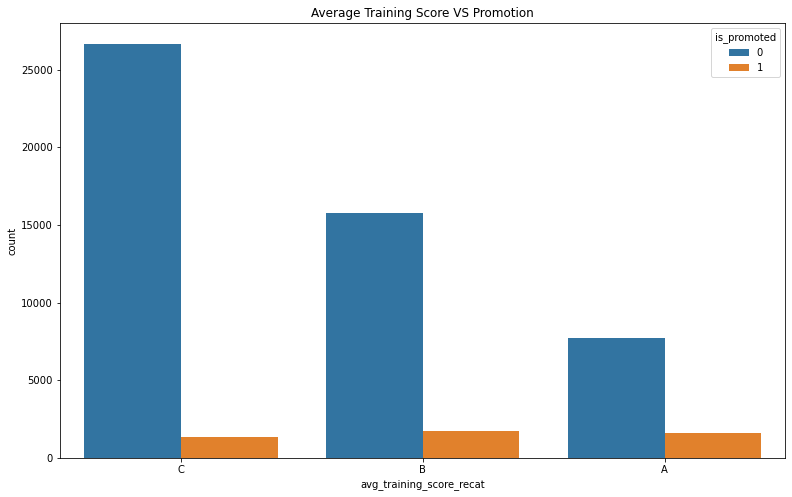

In [117]:
plt.figure(figsize=(13,8))
plt.title('Average Training Score VS Promotion')
sns.countplot(x=df['avg_training_score_recat'],hue=df['is_promoted']);

In [88]:
# Visualization of Data Relationship Between Avg Training Score and Promotion

- From EDA, we can conclude that:
    - From Correlation Ratio, previous year rating and average training score have impact on Promotion
    - From Association Cramer's V. Awards Won has impact on Promotion
    - Most of the Employee who got promotion were from Sales Department, but Technology Department have more portion or percentage of the employee promotion in a Department
    - Most of the Employee who got promotion achieved 5.0 previous rating, 81-100 avg training score, won an award previous year, recruited by reference, and at the age range 31-35, and recruited by Reference

# Preprocessing

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   department                54808 non-null  object  
 1   region                    54808 non-null  object  
 2   education                 52399 non-null  object  
 3   gender                    54808 non-null  object  
 4   recruitment_channel       54808 non-null  object  
 5   no_of_trainings           54808 non-null  int64   
 6   age                       54808 non-null  int64   
 7   previous_year_rating      50684 non-null  float64 
 8   length_of_service         54808 non-null  int64   
 9   awards_won?               54808 non-null  object  
 10  avg_training_score        54808 non-null  int64   
 11  is_promoted               54808 non-null  int64   
 12  age_recat                 54808 non-null  category
 13  no_of_trainings_recat     54808 non-null  obje

In [119]:
df.isna().sum()

department                     0
region                         0
education                   2409
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating        4124
length_of_service              0
awards_won?                    0
avg_training_score             0
is_promoted                    0
age_recat                      0
no_of_trainings_recat          0
length_of_service_recat        0
avg_training_score_recat       0
dtype: int64

In [120]:
df['education'].mode() #Fiiling Missing Value on Pipeline

0    Bachelor's
dtype: object

In [121]:
df[df['previous_year_rating'].isna()]['length_of_service'].value_counts() #Assume that All of the Missing Value on Previous Year Rating Features are the one who worked under 1 year of service

1    4124
Name: length_of_service, dtype: int64

In [122]:
df1 = df.dropna(subset=['previous_year_rating'],axis=0)

In [123]:
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat,length_of_service_recat,avg_training_score_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1,2,C
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1,1,C
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1,2,C
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others,2,C
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1,1,B


In [124]:
df1.isna().sum()

department                     0
region                         0
education                   2024
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating           0
length_of_service              0
awards_won?                    0
avg_training_score             0
is_promoted                    0
age_recat                      0
no_of_trainings_recat          0
length_of_service_recat        0
avg_training_score_recat       0
dtype: int64

In [125]:
def education_recat(x):
    if x == "Bachelor's":
        return 1
    elif x == "Master's & above" :
        return 2
    else :
        return 0

In [126]:
df1['education_recat'] = df1['education'].apply(education_recat)

In [127]:
df1['education_recat'].astype('int64')

0        2
1        1
2        1
3        1
4        1
        ..
54803    1
54804    2
54805    1
54806    0
54807    1
Name: education_recat, Length: 50684, dtype: int64

In [128]:
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,age_recat,no_of_trainings_recat,length_of_service_recat,avg_training_score_recat,education_recat
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,C,1,2,C,2
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,B,1,1,C,1
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,C,1,2,C,1
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,D,Others,2,C,1
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,E,1,1,B,1


df1.info()

In [129]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

- Data Splitting

In [130]:
X = df1[['department','region','education_recat','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']]

In [131]:
y = df1['is_promoted']

In [132]:
X.shape

(50684, 11)

In [133]:
y.shape

(50684,)

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,stratify=y,random_state=42)

- Pipeline Base Model (KNN, Logistic Regression, Random Forest)

In [135]:
num_columns = ['education_recat','no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']

cat_columns = ['department','region','gender','recruitment_channel','awards_won?']

In [136]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])

In [137]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric',cat_pipeline,cat_columns)
])

In [138]:
Pipe_KNN = Pipeline([
    ('prep',preprocessor),
    ('algo',KNeighborsClassifier())
])

Pipe_RF = Pipeline([
    ('prep',preprocessor),
    ('algo',RandomForestClassifier(class_weight={0:0.1, 1:0.9}))
])

Pipe_LR = Pipeline([
    ('prep',preprocessor),
    ('algo',LogisticRegression(class_weight={0:0.1, 1:0.9},solver='liblinear'))
])

In [139]:
Pipe_KNN.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['education_recat',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                            

In [140]:
Pipe_RF.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['education_recat',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                            

In [141]:
Pipe_LR.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['education_recat',
                                                   'no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                            

- Evaluation Matrix on Test Data

In [142]:
def Eva_Matrix_Class(Model,X,y_true):
    y_pred = Model.predict(X)
    acc = accuracy_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    cm = confusion_matrix(y_true,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(data=cm,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])
    cr = classification_report(y_true,y_pred)
    return acc, rec, prec, f1, df_cm, cr

In [143]:
acc_KNN, rec_KNN, prec_KNN, f1_KNN, cm_KNN , cr_KNN = Eva_Matrix_Class(Pipe_KNN,X_test,y_test)
acc_RF, rec_RF, prec_RF, f1_RF, cm_RF , cr_RF = Eva_Matrix_Class(Pipe_RF,X_test,y_test)
acc_LR, rec_LR, prec_LR, f1_LR, cm_LR , cr_LR = Eva_Matrix_Class(Pipe_LR,X_test,y_test)

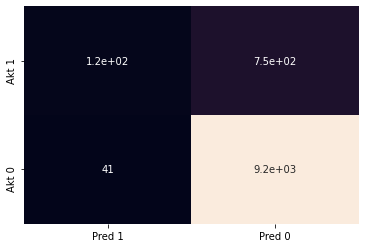

In [144]:
sns.heatmap(cm_KNN,cbar=False,annot=True);

In [145]:
print(cr_KNN)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9271
           1       0.74      0.14      0.23       866

    accuracy                           0.92     10137
   macro avg       0.83      0.57      0.60     10137
weighted avg       0.91      0.92      0.90     10137



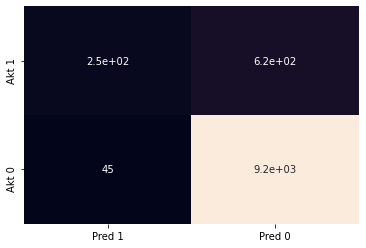

In [146]:
sns.heatmap(cm_RF,cbar=False,annot=True);

In [147]:
print(cr_RF)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9271
           1       0.85      0.29      0.43       866

    accuracy                           0.93     10137
   macro avg       0.89      0.64      0.70     10137
weighted avg       0.93      0.93      0.92     10137



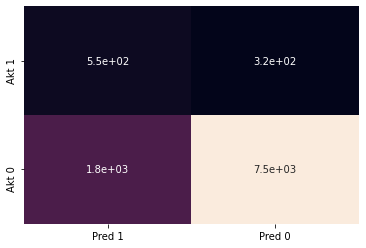

In [148]:
sns.heatmap(cm_LR,cbar=False,annot=True);

In [149]:
print(cr_LR)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9271
           1       0.24      0.63      0.35       866

    accuracy                           0.80     10137
   macro avg       0.60      0.72      0.61     10137
weighted avg       0.90      0.80      0.83     10137



- Hyperparameter Tuning

In [150]:
Pipe_KNN.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['education_recat', 'no_of_trainings', 'age',
                                     'previous_year_rating', 'length_of_service',
                                     'avg_training_score']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder', OneHotEncoder())]),
                                    ['department', 'region', 'gender',
                                     'recruitment_channel', 'awards_won?'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transfo

In [151]:
Pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['education_recat', 'no_of_trainings', 'age',
                                     'previous_year_rating', 'length_of_service',
                                     'avg_training_score']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder', OneHotEncoder())]),
                                    ['department', 'region', 'gender',
                                     'recruitment_channel', 'awards_won?'])])),
  ('algo', RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}))],
 'verbose': False,
 'p

In [152]:
Pipe_LR.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['education_recat', 'no_of_trainings', 'age',
                                     'previous_year_rating', 'length_of_service',
                                     'avg_training_score']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder', OneHotEncoder())]),
                                    ['department', 'region', 'gender',
                                     'recruitment_channel', 'awards_won?'])])),
  ('algo',
   LogisticRegression(class_weight={0: 0.1, 1: 0.9}, solver='liblinear'))],
 'v

In [153]:
# Iteration 1 : n-neighbors = 1-9 >> result best param = 9
# Iteration 2 : n-neighbors = 9-19 >> result best param = 9

In [154]:
param_KNN = {
    'algo__n_neighbors' : np.arange(9,20,2),
    'algo__weights' : ['uniform','distance']
}

In [155]:
param_RF = {
    'algo__max_depth' : np.arange(10,100),
    'algo__min_samples_leaf' : np.arange(1,5),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
}

In [156]:
param_LR = {
    'algo__C' : np.arange(1,11,2),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
    'algo__l1_ratio' : np.arange(0,1.1,0.2)
}

In [157]:
skf = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

In [158]:
GS_KNN = GridSearchCV(Pipe_KNN,param_KNN, cv=skf, scoring='f1',verbose=1)

In [159]:
GS_KNN.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  9.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['education_recat',
                                                                          'no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'avg_training_score']),

In [160]:
GS_KNN.best_params_

{'algo__n_neighbors': 9, 'algo__weights': 'distance'}

In [161]:
KNN_Tuned = GS_KNN.best_estimator_

In [162]:
acc_KNN_Tuned, rec_KNN_Tuned, prec_KNN_Tuned, f1_KNN_Tuned, cm_KNN_Tuned , cr_KNN_Tuned = Eva_Matrix_Class(KNN_Tuned,X_test,y_test)

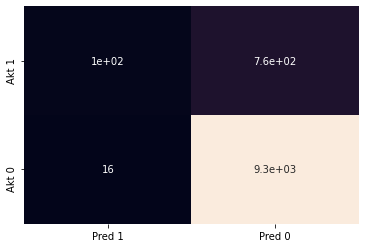

In [163]:
sns.heatmap(cm_KNN_Tuned,cbar=False,annot=True);

In [164]:
print(cr_KNN_Tuned)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9271
           1       0.87      0.12      0.21       866

    accuracy                           0.92     10137
   macro avg       0.90      0.56      0.59     10137
weighted avg       0.92      0.92      0.90     10137



In [165]:
RS_RF = RandomizedSearchCV(Pipe_RF,param_RF, cv=skf, scoring='f1',verbose=1,n_iter=100)

In [166]:
RS_RF.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 51.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['education_recat',
                                                                                'no_of_trainings',
                                                                                'age',
                                                                                'previous_year_rating',
                                                                                'length_of_service',
                                     

In [167]:
RS_RF.best_params_

{'algo__min_samples_leaf': 2,
 'algo__max_depth': 34,
 'algo__class_weight': {0: 0.1, 1: 0.9}}

In [195]:
RF_Tuned = RS_RF.best_estimator_

In [196]:
acc_RF_Tuned, rec_RF_Tuned, prec_RF_Tuned, f1_RF_Tuned, cm_RF_Tuned , cr_RF_Tuned = Eva_Matrix_Class(RF_Tuned,X_test,y_test)

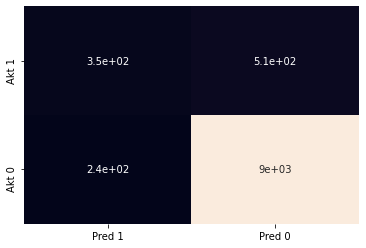

In [197]:
sns.heatmap(cm_RF_Tuned,cbar=False,annot=True);

In [171]:
print(cr_RF_Tuned)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9271
           1       0.59      0.41      0.48       866

    accuracy                           0.93     10137
   macro avg       0.77      0.69      0.72     10137
weighted avg       0.92      0.93      0.92     10137



In [172]:
GS_LR = GridSearchCV(Pipe_LR,param_LR, cv=skf, scoring='f1',verbose=1)

In [173]:
GS_LR.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['education_recat',
                                                                          'no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'avg_training_score']),

In [174]:
GS_LR.best_params_

{'algo__C': 9, 'algo__class_weight': {0: 0.3, 1: 0.7}, 'algo__l1_ratio': 0.0}

In [175]:
LR_Tuned = GS_LR.best_estimator_

In [176]:
acc_LR_Tuned, rec_LR_Tuned, prec_LR_Tuned, f1_LR_Tuned, cm_LR_Tuned , cr_LR_Tuned = Eva_Matrix_Class(LR_Tuned,X_test,y_test)

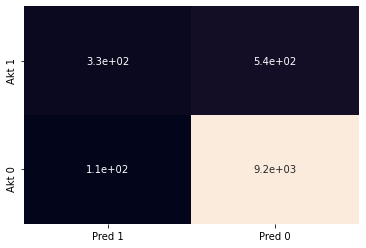

In [177]:
sns.heatmap(cm_LR_Tuned,cbar=False,annot=True);

In [178]:
print(cr_LR_Tuned)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9271
           1       0.75      0.38      0.50       866

    accuracy                           0.94     10137
   macro avg       0.85      0.68      0.74     10137
weighted avg       0.93      0.94      0.93     10137



- Feature Engineering (Feature Selection)
    - From Correlation Ratio and Association on Features, we select the no_of_trainings, previous_year_rating, and awards_won for modelling

In [198]:
X_select = df1[['avg_training_score','previous_year_rating','awards_won?']]

In [199]:
y_select = df1['is_promoted']

In [200]:
X_train_select,X_test_select,y_train_select,y_test_select = train_test_split(X_select,y_select,train_size=.80,stratify=y_select,random_state=42)

In [205]:
num_columns1 = ['avg_training_score','previous_year_rating']

cat_columns1 = ['awards_won?']

num_pipeline1 = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
])

cat_pipeline1 = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])

preprocessor1 = ColumnTransformer([
    ('numeric',num_pipeline1,num_columns1),
    ('categoric',cat_pipeline1,cat_columns1)
])

Pipe_KNN_select = Pipeline([
    ('prep',preprocessor1),
    ('algo',KNeighborsClassifier())
])

Pipe_RF_select = Pipeline([
    ('prep',preprocessor1),
    ('algo',RandomForestClassifier(class_weight={0:0.1, 1:0.9}))
])

Pipe_LR_select = Pipeline([
    ('prep',preprocessor1),
    ('algo',LogisticRegression(class_weight={0:0.1, 1:0.9},solver='liblinear'))
])

In [206]:
Pipe_KNN_select.fit(X_train_select,y_train_select)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['avg_training_score',
                                                   'previous_year_rating']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won?'])])),
                ('algo', KNeighborsClassifier())])

In [207]:
Pipe_RF_select.fit(X_train_select,y_train_select)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['avg_training_score',
                                                   'previous_year_rating']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won?'])])),
                ('algo',
                 RandomForestClassifier(class_weight={0: 0.1, 1:

In [208]:
Pipe_LR_select.fit(X_train_select,y_train_select)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['avg_training_score',
                                                   'previous_year_rating']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['awards_won?'])])),
                ('algo',
                 LogisticRegression(class_weight={0: 0.1, 1: 0.9

In [209]:
acc_KNN_select, rec_KNN_select, prec_KNN_select, f1_KNN_select, cm_KNN_select , cr_KNN_select = Eva_Matrix_Class(Pipe_KNN_select,X_test_select,y_test_select)
acc_RF_select, rec_RF_select, prec_RF_select, f1_RF_select, cm_RF_select , cr_RF_select = Eva_Matrix_Class(Pipe_RF_select,X_test_select,y_test_select)
acc_LR_select, rec_LR_select, prec_LR_select, f1_LR_select, cm_LR_select , cr_LR_select = Eva_Matrix_Class(Pipe_LR_select,X_test_select,y_test_select)

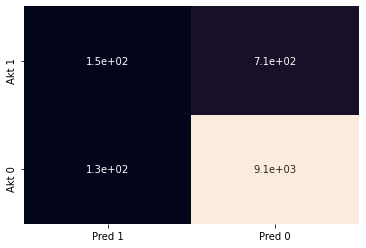

In [210]:
sns.heatmap(cm_KNN_select,cbar=False,annot=True);

In [211]:
print(cr_KNN_select)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9271
           1       0.54      0.18      0.27       866

    accuracy                           0.92     10137
   macro avg       0.73      0.58      0.61     10137
weighted avg       0.89      0.92      0.90     10137



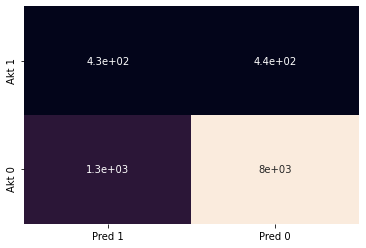

In [212]:
sns.heatmap(cm_RF_select,cbar=False,annot=True);

In [213]:
print(cr_RF_select)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9271
           1       0.25      0.49      0.33       866

    accuracy                           0.83     10137
   macro avg       0.60      0.68      0.62     10137
weighted avg       0.89      0.83      0.85     10137



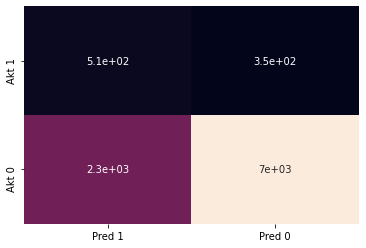

In [214]:
sns.heatmap(cm_LR_select,cbar=False,annot=True);

In [215]:
print(cr_LR_select)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      9271
           1       0.18      0.59      0.28       866

    accuracy                           0.74     10137
   macro avg       0.57      0.67      0.56     10137
weighted avg       0.89      0.74      0.79     10137



- Improvement Hyperparameter Tuning (Feature Selection)

In [216]:
param_KNN_select = {
    'algo__n_neighbors' : np.arange(1,10,2),
    'algo__p' : [1,2],
    'algo__weights' : ['uniform','distance']
}

In [217]:
param_RF_select = {
    'algo__max_depth' : np.arange(10,100),
    'algo__min_samples_leaf' : np.arange(1,5),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
}

In [218]:
param_LR_select = {
    'algo__C' : np.arange(1,11,2),
    'algo__class_weight' : [{0:i,1:(1-i)} for i in [0.1,0.2,0.3,0.4]],
    'algo__l1_ratio' : np.arange(0,1.1,0.2)
}

In [219]:
GS_KNN_select = GridSearchCV(Pipe_KNN_select,param_KNN_select, cv=skf, scoring='f1',verbose=1)

In [220]:
GS_KNN_select.fit(X_train_select,y_train_select)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['avg_training_score',
                                                                          'previous_year_rating']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                          

In [221]:
GS_KNN_select.best_params_

{'algo__n_neighbors': 5, 'algo__p': 1, 'algo__weights': 'uniform'}

In [222]:
KNN_Tuned_select = GS_KNN_select.best_estimator_

In [223]:
acc_KNN_Tuned_select, rec_KNN_Tuned_select, prec_KNN_Tuned_select, f1_KNN_Tuned_select, cm_KNN_Tuned_select , cr_KNN_Tuned_select = Eva_Matrix_Class(KNN_Tuned_select,X_test_select,y_test_select)

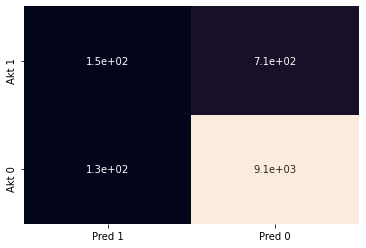

In [224]:
sns.heatmap(cm_KNN_Tuned_select,cbar=False,annot=True);

In [225]:
print(cr_KNN_Tuned_select)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9271
           1       0.54      0.18      0.26       866

    accuracy                           0.92     10137
   macro avg       0.73      0.58      0.61     10137
weighted avg       0.89      0.92      0.90     10137



In [227]:
RS_RF_select = RandomizedSearchCV(Pipe_RF_select,param_RF_select, cv=skf, scoring='f1',verbose=1,n_iter=100)

In [229]:
RS_RF_select.fit(X_train_select,y_train_select)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['avg_training_score',
                                                                                'previous_year_rating']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='

In [230]:
RS_RF_select.best_params_

{'algo__min_samples_leaf': 4,
 'algo__max_depth': 39,
 'algo__class_weight': {0: 0.2, 1: 0.8}}

In [231]:
RF_Tuned_select = RS_RF_select.best_estimator_

In [232]:
acc_RF_Tuned_select, rec_RF_Tuned_select, prec_RF_Tuned_select, f1_RF_Tuned_select, cm_RF_Tuned_select , cr_RF_Tuned_select = Eva_Matrix_Class(RF_Tuned_select,X_test_select,y_test_select)

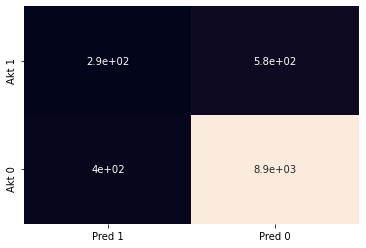

In [233]:
sns.heatmap(cm_RF_Tuned_select,cbar=False,annot=True);

In [234]:
print(cr_RF_Tuned_select)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9271
           1       0.42      0.33      0.37       866

    accuracy                           0.90     10137
   macro avg       0.68      0.64      0.66     10137
weighted avg       0.89      0.90      0.90     10137



In [235]:
GS_LR_select = GridSearchCV(Pipe_LR_select,param_LR_select, cv=skf, scoring='f1',verbose=1)

In [236]:
GS_LR_select.fit(X_train_select,y_train_select)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   27.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['avg_training_score',
                                                                          'previous_year_rating']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                          

In [237]:
GS_LR_select.best_params_

{'algo__C': 5, 'algo__class_weight': {0: 0.2, 1: 0.8}, 'algo__l1_ratio': 0.0}

In [238]:
LR_Tuned_select = GS_LR_select.best_estimator_

In [239]:
acc_LR_Tuned_select, rec_LR_Tuned_select, prec_LR_Tuned_select, f1_LR_Tuned_select, cm_LR_Tuned_select , cr_LR_Tuned_select = Eva_Matrix_Class(LR_Tuned_select,X_test_select,y_test_select)

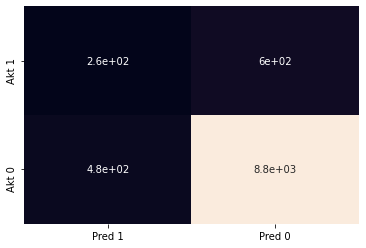

In [240]:
sns.heatmap(cm_LR_Tuned_select,cbar=False,annot=True);

In [241]:
print(cr_LR_Tuned_select)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9271
           1       0.35      0.31      0.33       866

    accuracy                           0.89     10137
   macro avg       0.65      0.63      0.64     10137
weighted avg       0.89      0.89      0.89     10137



In [242]:
data_Eva_Matrix = {
    'KNN' :[acc_KNN, rec_KNN, prec_KNN, f1_KNN],
    'KNN_Tuned' :[acc_KNN_Tuned, rec_KNN_Tuned, prec_KNN_Tuned, f1_KNN_Tuned],
    'KNN_select' :[acc_KNN_select, rec_KNN_select, prec_KNN_select, f1_KNN_select],
    'KNN_Tuned_select' :[acc_KNN_Tuned_select, rec_KNN_Tuned_select, prec_KNN_Tuned_select, f1_KNN_Tuned_select],
    'RF' :[acc_RF, rec_RF, prec_RF, f1_RF],
    'RF_Tuned' :[acc_RF_Tuned, rec_RF_Tuned, prec_RF_Tuned, f1_RF_Tuned],
    'RF_select' :[acc_RF_select, rec_RF_select, prec_RF_select, f1_RF_select],
    'RF_Tuned_select' :[acc_RF_Tuned_select, rec_RF_Tuned_select, prec_RF_Tuned_select, f1_RF_Tuned_select],
    'LR' :[acc_LR, rec_LR, prec_LR, f1_LR],
    'LR_Tuned' :[acc_LR_Tuned, rec_LR_Tuned, prec_LR_Tuned, f1_LR_Tuned],
    'LR_select' :[acc_LR_select, rec_LR_select, prec_LR_select, f1_LR_select],
    'LR_Tuned_select' :[acc_LR_Tuned_select, rec_LR_Tuned_select, prec_LR_Tuned_select, f1_LR_Tuned_select],
    
}


In [243]:
pd.DataFrame(data_Eva_Matrix,index=['Accuracy','Recall','Precision','F1'])

,KNN,KNN_Tuned,KNN_select,KNN_Tuned_select,RF,RF_Tuned,RF_select,RF_Tuned_select,LR,LR_Tuned,LR_select,LR_Tuned_select
Accuracy,0.922265,0.923251,0.916839,0.916741,0.934695,0.925422,0.828352,0.903029,0.795798,0.936174,0.741048,0.893065
Recall,0.137413,0.120092,0.176674,0.175520,0.287529,0.407621,0.491917,0.330254,0.630485,0.381062,0.592379,0.306005
Precision,0.743750,0.866667,0.540636,0.539007,0.846939,0.592282,0.246813,0.415094,0.237805,0.748299,0.184201,0.354278
F1,0.231969,0.210953,0.266319,0.264808,0.429310,0.482900,0.328704,0.367846,0.345351,0.504973,0.281019,0.328377


- Using Best Model to Predict Probability (Logistic Regression Tuned)

In [244]:
X_test

,department,region,education_recat,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
44118,Analytics,region_15,1,m,other,1,26,3.0,3,0,82
21322,Analytics,region_22,1,f,sourcing,1,27,4.0,4,0,84
30620,Sales & Marketing,region_30,1,f,other,1,31,3.0,3,0,53
48124,Sales & Marketing,region_26,1,m,sourcing,1,24,1.0,2,0,48
5728,Technology,region_23,1,m,sourcing,2,32,3.0,5,0,84
...,...,...,...,...,...,...,...,...,...,...,...
52496,Analytics,region_22,0,m,sourcing,2,28,4.0,4,0,89
37852,Sales & Marketing,region_7,1,m,other,1,27,4.0,2,0,51
9248,Technology,region_2,2,f,sourcing,2,42,5.0,13,0,82
27306,Operations,region_22,2,f,sourcing,1,50,4.0,18,0,58


In [245]:
proba = LR_Tuned.predict_proba(X_test)

In [246]:
pred = LR_Tuned.predict(X_test)

In [247]:
df_proba = X_test

In [248]:
df_proba['is_promoted'] = y_test

In [249]:
df_proba['prediction'] = pred

In [250]:
df_proba[['Probability 0','Probability 1']] = proba

In [252]:
df_proba

,department,region,education_recat,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,prediction,Probability 0,Probability 1
44118,Analytics,region_15,1,m,other,1,26,3.0,3,0,82,0,0,0.923196,0.076804
21322,Analytics,region_22,1,f,sourcing,1,27,4.0,4,0,84,0,0,0.759023,0.240977
30620,Sales & Marketing,region_30,1,f,other,1,31,3.0,3,0,53,0,0,0.860398,0.139602
48124,Sales & Marketing,region_26,1,m,sourcing,1,24,1.0,2,0,48,0,0,0.979799,0.020201
5728,Technology,region_23,1,m,sourcing,2,32,3.0,5,0,84,0,0,0.697957,0.302043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52496,Analytics,region_22,0,m,sourcing,2,28,4.0,4,0,89,0,0,0.627112,0.372888
37852,Sales & Marketing,region_7,1,m,other,1,27,4.0,2,0,51,0,0,0.782547,0.217453
9248,Technology,region_2,2,f,sourcing,2,42,5.0,13,0,82,0,0,0.606335,0.393665
27306,Operations,region_22,2,f,sourcing,1,50,4.0,18,0,58,0,0,0.882076,0.117924


In [253]:
df_proba[df_proba['prediction']==1]

,department,region,education_recat,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,prediction,Probability 0,Probability 1
49529,Sales & Marketing,region_3,2,m,other,1,33,5.0,2,0,92,1,1,0.000273,0.999727
28171,Operations,region_7,1,f,sourcing,1,43,3.0,13,0,71,1,1,0.449788,0.550212
17319,Technology,region_2,1,f,referred,2,37,5.0,4,1,83,1,1,0.184602,0.815398
37792,Finance,region_26,1,m,sourcing,1,31,5.0,5,1,67,1,1,0.165942,0.834058
14637,Sales & Marketing,region_4,2,m,other,1,43,4.0,4,1,54,0,1,0.210088,0.789912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,HR,region_13,1,f,other,1,31,5.0,2,1,54,0,1,0.344846,0.655154
23749,Technology,region_22,2,m,other,2,43,4.0,11,0,89,1,1,0.302725,0.697275
10947,Technology,region_2,1,m,other,1,27,5.0,3,0,83,1,1,0.486963,0.513037
27529,Operations,region_2,2,m,other,1,39,3.0,5,0,78,1,1,0.142826,0.857174
